

На этот раз данные имеют следующую структуру:
- записываются для каждого пользователя, совершившего покупки, каждый день
- для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
- внутри каждой папки есть файл data.csv, где и хранятся данные

Схематично выглядит так:

└── data

   ├── 2020-12-30
   
      │  ├── FirstName_LastName1
      
         │  │   └── data.csv
         
            │  ├── FirstName_LastName2
            
               │  │   └── data.csv
               
                  │  └── FirstName_LastName3
                  
                     │      └── data.csv
                     
                        └── 2020-12-31
                        
                              ├── FirstName_LastName1
                              
                                    │   └── data.csv
                                    
                                          └── FirstName_LastName5
                                          
                                                    └── data.csv

In [72]:
import pandas as pd
#для работы с файлами
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
#os.listdir(~/) - список всех файлов в нужной директории
os.listdir('C:/Users/stale/Task4_KC/data/2020-12-03/Alexey_Smirnov/')

['data.csv']

Напишем функцию, с помощью которой по необходимым путям мы можем собрать данные в один датафрейм.

In [40]:
def building_dataframe(path_data):
    dict_df = []
    df = pd.DataFrame(columns=['Unnamed: 0', 'product_id', 'quantity', 'date', 'name'])
    path_for_dates = os.listdir(path_data)
    for i in path_for_dates:
        date = i
        path_for_names = os.listdir(path_data+date+'/')
        for name in path_for_names:
            name_and_surname = name
            path_for_csv = os.listdir(path_data+date+'/'+name_and_surname+'/')
            final_path = path_data+date+'/'+name_and_surname+'/'+path_for_csv[0]
            key = date+'_'+name_and_surname
            data = pd.read_csv(final_path, sep=",")
            len_data = data.shape[0]
            data['date'] = [date]*len_data
            data['name'] = [name_and_surname]*len_data
            dict_df.append(data)
            df = pd.concat([df, data], ignore_index=True)

    return dict_df, df

In [41]:
dict_df, df = building_dataframe(path_data='C:/Users/stale/Task4_KC/data/')

In [43]:
df = df.drop(['Unnamed: 0'],axis=1)

In [53]:
df

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...
156,66,4,2020-12-09,Rostislav_Petrov
157,39,2,2020-12-09,Rostislav_Petrov
158,82,4,2020-12-09,Vasiliy_Ivanov
159,74,2,2020-12-09,Vasiliy_Ivanov


- Теперь необходимо выяснить какой пользователь купил больше всего товаров. Если их несколько, то перечислить имена через запятую с пробелом и в алфавитном порядке.

In [54]:
count_quantity_df = df \
    .groupby('name', as_index=False) \
    .agg({'quantity':'sum'}) \
    .rename(columns={'quantity':'count_quantity'}) \
    .sort_values('count_quantity', ascending=False) \
    .reset_index(drop=True)
count_quantity

,name,count_quantity
0,Alexey_Smirnov,52
1,Petr_Smirnov,52
2,Anton_Smirnov,45
3,Petr_Fedorov,34
4,Kirill_Fedorov,28
5,Rostislav_Petrov,28
6,Vasiliy_Ivanov,27
7,Alexey_Fedorov,24
8,Anton_Ivanov,23
9,Petr_Ivanov,21


In [56]:
max_count = count_quantity_df.count_quantity.max()
max_count

52

In [63]:
list_names_max_count = list(count_quantity_df.query('count_quantity == 52').name)
str_names = ', '.join(list_names_max_count)
print('Пользователи которые купили больше всего товаров: '+str_names)

Пользователи которые купили больше всего товаров: Alexey_Smirnov, Petr_Smirnov


- Также необходимо найти  топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [74]:
top_product = df \
    .groupby('product_id', as_index=False) \
    .agg({'quantity':'sum'}) \
    .rename(columns={'quantity':'count_quantity'}) \
    .sort_values('count_quantity', ascending=False) \
    .reset_index(drop=True) 

In [78]:
top_10 = top_product.head(10)
top_10

,product_id,count_quantity
0,27,20
1,56,18
2,24,15
3,74,15
4,41,14
5,34,13
6,94,13
7,66,13
8,92,12
9,50,12


<AxesSubplot: xlabel='product_id', ylabel='count_quantity'>

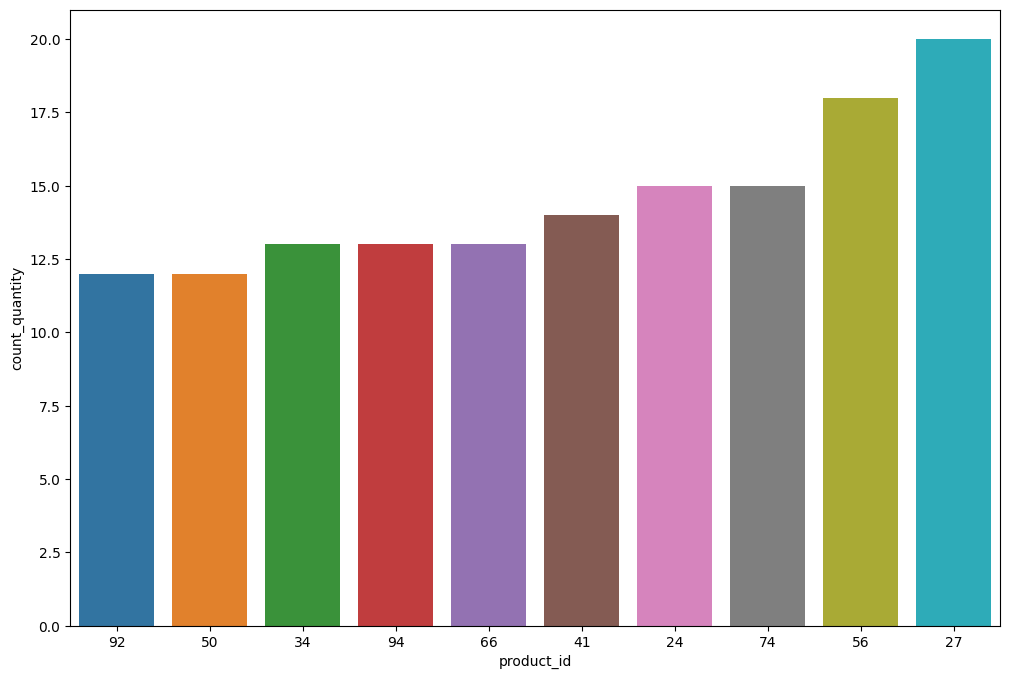

In [80]:
plt.figure(figsize=(12,8))

sns.barplot(x='product_id', y = 'count_quantity', data=top_10, order= top_10.sort_values('count_quantity').product_id )

Таким образом, самый популярный товар (20 проданых единиц за все время) из топ 10 - это товар с product_id == 27. 

In [83]:
count_quantity_id_56 = list(top_10.query('product_id == 56').count_quantity)[0]
print(f'Всего было  продано {count_quantity_id_56} единиц товара с product_id == 56.')

Всего было  продано 18 единиц товара с product_id == 56.


- Визуализируем продажи по дням.

In [84]:
df.dtypes

product_id    object
quantity      object
date          object
name          object
dtype: object

In [85]:
#необходимо преобразовать в тип 
df['date'] = pd.to_datetime(df.date)

In [90]:
df['day'] = df.date.dt.day

In [94]:
quantity_in_day = df.groupby('day', as_index=False) \
    .agg({'quantity':'sum'}) \
    .rename(columns={'quantity':'count_quantity_in_day'}) \
    .sort_values('day')
quantity_in_day

,day,count_quantity_in_day
0,3,60
1,4,113
2,5,61
3,6,15
4,7,94
5,8,68
6,9,69


<AxesSubplot: xlabel='day', ylabel='count_quantity_in_day'>

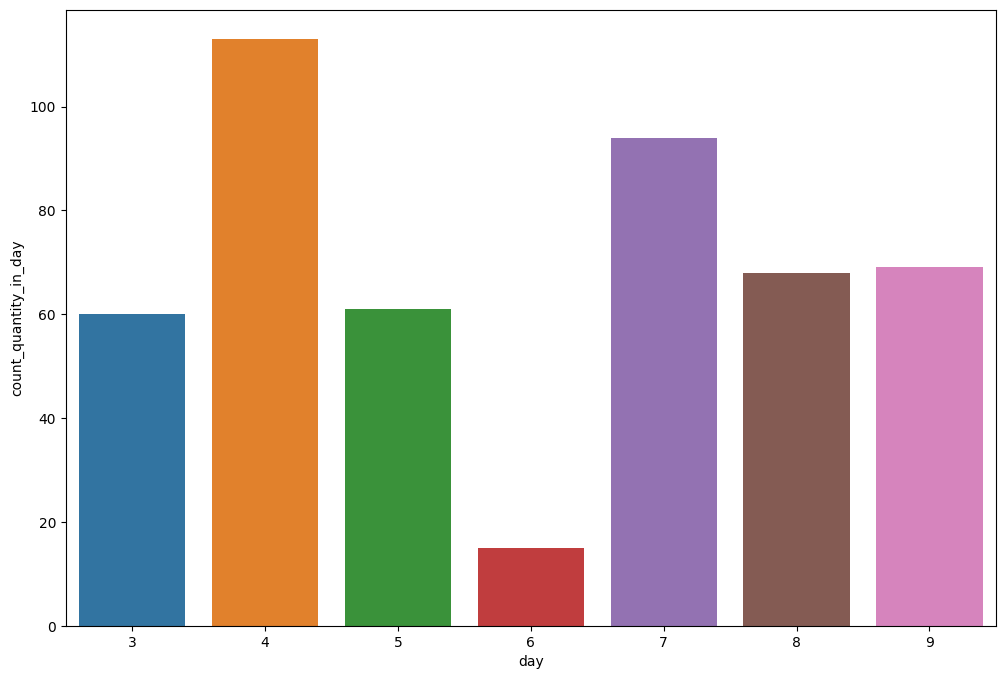

In [95]:
plt.figure(figsize=(12,8))

sns.barplot(x='day', y='count_quantity_in_day', data=quantity_in_day)

- Посчитаем сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.

In [103]:
df.groupby(['name','product_id'], as_index=False) \
    .agg({'date': lambda group: group.nunique()}) \
    .query('date > 1') 

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
